In [7]:
from ipyfilechooser import FileChooser

def print_file(chooser):
    if not dirI.selected_path == None and not dirO.selected == None: 
        print(dirI.selected_path)
        print(dirO.selected)

#Input Directory
dirI = FileChooser('')
dirI.default_path = 'E:\Blender\BlenderWork\^CV Training Dataset Generation\Training Data\ScriptTesting\Test 2023-03-12_22-16-39'
dirI.default_filename = ''
dirI.title = '<b>Select Input Dataset</b>'
dirI.register_callback(print_file)

# Output Director
dirO = FileChooser('')
dirO.default_filename = 'model.json'
dirO.title = '<b>Output model as...</b>'
dirO.filter_pattern = '*.json'
dirO.register_callback(print_file)

display(dirI)
display(dirO)

FileChooser(path='E:\Blender\BlenderWork\^CV Training Dataset Generation\Training Data\ScriptTesting\Test 2023…

FileChooser(path='C:\Users\Yabba\Documents\Projects\SeniorResearch\23FebCV', filename='model.json', title='<b>…

E:\Blender\BlenderWork\^CV Training Dataset Generation\Training Data\ScriptTesting\Test 2023-03-12_22-16-39
C:\Users\Yabba\Documents\Projects\SeniorResearch\23FebCV\model.json


Found 1944 files belonging to 12 classes.
Using 1556 files for training.
Found 1944 files belonging to 12 classes.
Using 388 files for validation.
['A-10A_Thunderbolt_II_(Late)', 'A-26C-45_Invader', 'AH-1G', 'B-29A-BN_Superfortress', 'F-100D_Super_Sabre', 'F-104C_Starfighter', 'F4F-4_Wildcat', 'F4U-4B_Corsair', 'F6F-5_Hellcat', 'P-47D-25_Thunderbolt', 'PBJ-1H', 'UH-1B']
(32, 128, 128, 4)
(32,)
0.0 1.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 4)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      592       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                             

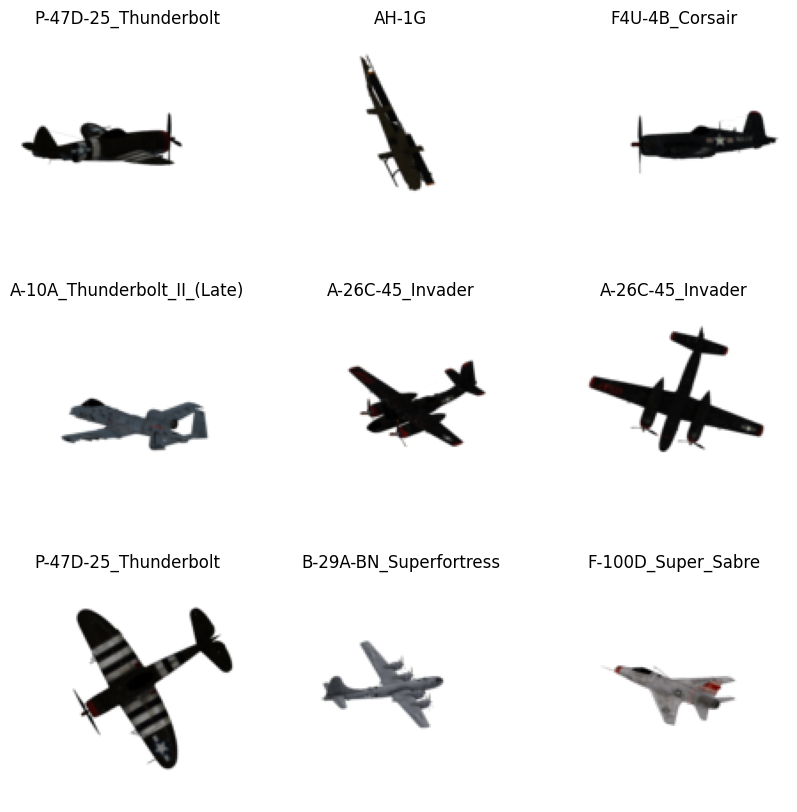

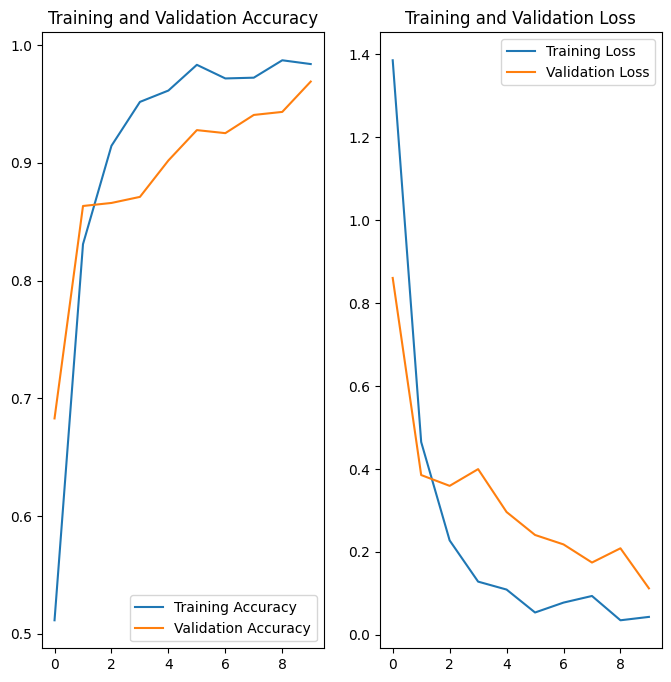

INFO:tensorflow:Assets written to: C:\Users\Yabba\Documents\Projects\SeniorResearch\23FebCV\model.json\assets


INFO:tensorflow:Assets written to: C:\Users\Yabba\Documents\Projects\SeniorResearch\23FebCV\model.json\assets


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

#data_dir = 'E:\Blender\BlenderWork\^CV Training Dataset Generation\Training Data\ScriptTesting\Test 2023-03-12_22-16-39'
data_dir = dirI.selected_path

train_ds = tf.keras.utils.image_dataset_from_directory(
    color_mode='rgba',
    directory=data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128, 128),
    batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
    color_mode='rgba',
    directory=data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32)

class_names = train_ds.class_names
print(class_names)



for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = tf.keras.layers.Rescaling(1./255)

num_classes = len(class_names)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

model = Sequential([
  layers.Rescaling(1./255, input_shape=(128, 128, 4)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.save(filepath = dirO.selected,save_format='tf')